In [1]:
from math import ceil
import numpy as np
from scipy import linalg

def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

In [2]:
import math
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f =0.25
iterations=3
yest = lowess(x, y, f, iterations)

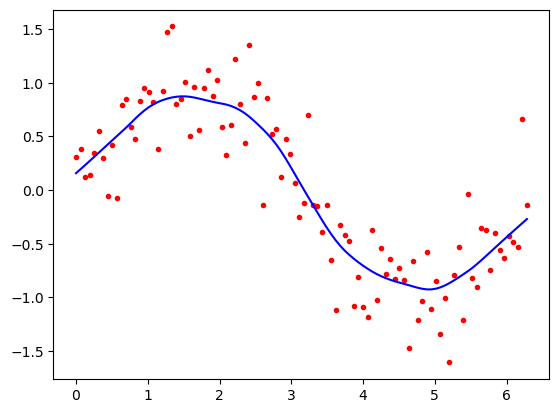

In [3]:
import matplotlib.pyplot as plt
plt.plot(x,y,"r.")
plt.plot(x,yest,"b-")

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point, xmat, k):
    m,n= np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - x[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localweight(point,xmat, ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localweightRegression(xmat,ymat,k):
    m,n= np.shape(xmat)
    ypred = np.zeros(m) 
    for i in range(m):
        ypred[i] = xmat[i]*localweight(xmat[i],xmat,ymat,k)
    return ypred

data = pd.read_csv('dataset/data.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill) [1]
one = np.mat(np.ones(m))
X= np.hstack((one.T,mbill.T))
ypred =localweightRegression(X,mtip, 2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill, tip, color='blue')
ax.plot(xsort [:,1], ypred [SortIndex], color = 'red', linewidth=1)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

IndexError: index 100 is out of bounds for axis 0 with size 100